In [1]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#IMPORTING THE TRAIN SUBSET OF THE DATASET
fashion_train_df=pd.read_csv("fashion-mnist_train.csv",sep=",")

In [3]:
#IMPORTING THE TEST SUBSET OF THE DATASET
fashion_test_df=pd.read_csv("fashion-mnist_test.csv",sep=",")

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train=np.array(fashion_train_df,dtype="float32")

In [7]:
test=np.array(fashion_test_df,dtype="float32")

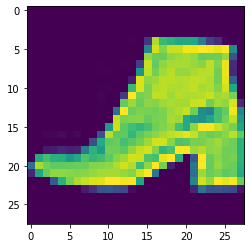

In [8]:
plt.imshow(train[1111,1:].reshape(28,28))

In [9]:
import random

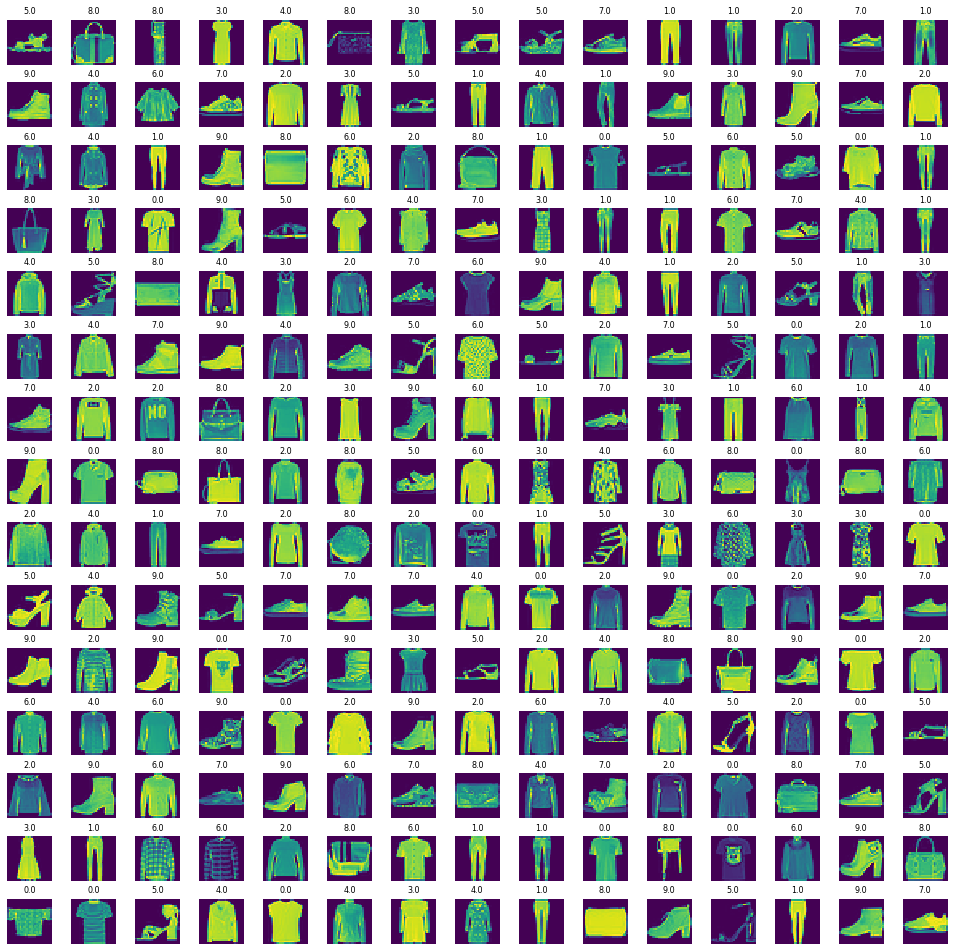

In [10]:
#Lets view more images in grid view
#Define dimensionof plot grid
w_grid=15
l_grid=15

#fig,axis=plt.subplot(l_grid,w_grid)
#subplot return the fig object and axes object
#we can use the axes object to plot specific figure at various location


fig, axes=plt.subplots(l_grid,w_grid,figsize=(17,17))

axes=axes.ravel() #flaten the 15*15 matrix into 225 array
n_train=len(train) #get the length of training dataset

#select a random number from 0 to n_train
for i in np.arange(0,l_grid*w_grid):    #create evenly space variables
    #Select a random number
    index=np.random.randint(0,n_train)
    #read and select a image with the selected index
    axes[i].imshow(train[index,1:].reshape(28,28))
    axes[i].set_title(train[index,0],fontsize=8)
    axes[i].axis("off")
    
plt.subplots_adjust(hspace=0.4)

In [11]:
x_train1=train[:,1:]/255
y_train1=train[:,0]

In [12]:
x_test=test[:,1:]/255
y_test=test[:,0]

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
x_train,x_validate,y_train,y_validate=train_test_split(x_train1,y_train1,test_size=0.2,random_state=12345)

In [15]:
x_train=x_train.reshape(x_train.shape[0],*(28,28,1))
x_test=x_test.reshape(x_test.shape[0],*(28,28,1))
x_validate=x_validate.reshape(x_validate.shape[0],*(28,28,1))

In [16]:
x_train.shape,x_test.shape,x_validate.shape

((48000, 28, 28, 1), (10000, 28, 28, 1), (12000, 28, 28, 1))

In [18]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [20]:
cnn_model=Sequential()

In [21]:
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [22]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
cnn_model.add(Flatten())

In [24]:
cnn_model.add(Dense(output_dim=32,activation='relu'))

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [25]:
cnn_model.add(Dense(output_dim=10,activation='sigmoid'))

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [26]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [27]:
epochs=50

In [31]:
cnn_model.fit(x_train,
             y_train,
             batch_size=512,
             nb_epoch=5,
             verbose=1,
             validation_data=(x_validate,y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
  512/48000 [..............................] - ETA: 9s - loss: 0.2532 - accuracy: 0.9199

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


48000/48000 [==============================] - 12s 243us/step - loss: 0.2399 - accuracy: 0.9153 - val_loss: 0.2816 - val_accuracy: 0.8962
Epoch 2/5
48000/48000 [==============================] - 13s 269us/step - loss: 0.2408 - accuracy: 0.9146 - val_loss: 0.2744 - val_accuracy: 0.9020
Epoch 3/5
48000/48000 [==============================] - 13s 267us/step - loss: 0.2300 - accuracy: 0.9198 - val_loss: 0.2721 - val_accuracy: 0.9016
Epoch 4/5
48000/48000 [==============================] - 13s 274us/step - loss: 0.2258 - accuracy: 0.9199 - val_loss: 0.2703 - val_accuracy: 0.9038
Epoch 5/5
48000/48000 [==============================] - 14s 284us/step - loss: 0.2238 - accuracy: 0.9208 - val_loss: 0.2671 - val_accuracy: 0.9038


In [32]:
evaluation=cnn_model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 82us/step


In [33]:
predicted_class=cnn_model.predict_classes(x_test)

In [34]:
predicted_class

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

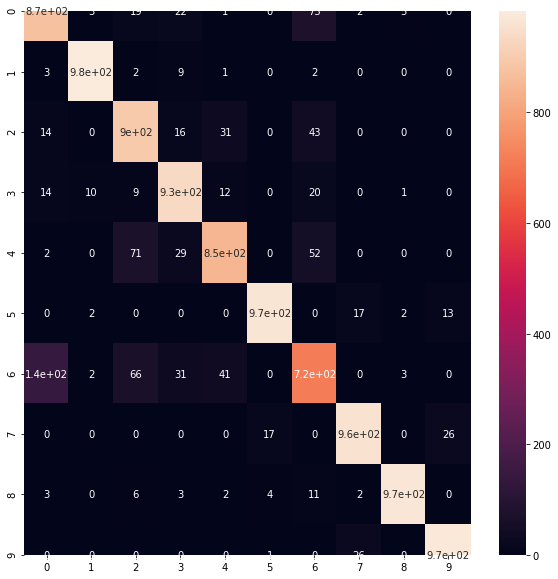

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted_class)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)